In [8]:
# Instalar bibliotecas necessárias
!pip install seaborn scipy scikit-learn

# **PARTE 2: ANÁLISE DE DADOS COM PYTHON**

Este código realiza a análise exploratória, temporal e segmentação de clientes
para o desafio técnico de e-commerce. Ele carrega os CSVs gerados, gera estatísticas,
identifica outliers, plota gráficos e segmenta clientes usando o modelo RFM.
- Todos os resultados (gráficos e CSVs) são salvos no Google Drive.

# 1. Configuração Inicial

In [9]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from google.colab import drive
import os

# Instalando bibliotecas, se necessário
print("Instalando bibliotecas seaborn e scipy...")
!pip install seaborn scipy

# Montando o Google Drive para acessar os CSVs
print("\nMontando Google Drive...")
drive.mount('/content/drive', force_remount=True)

# Definindo o caminho da pasta Ecommerce_Dataset
base_path = '/content/drive/MyDrive/Ecommerce_Dataset/'

# Verificando arquivos na pasta para confirmar que os CSVs estão presentes
print("\nArquivos encontrados na pasta Ecommerce_Dataset:")
print(os.listdir(base_path))

# Carregando os CSVs em DataFrames
print("\nCarregando arquivos CSV...")
customers_df = pd.read_csv(base_path + 'customers.csv')
products_df = pd.read_csv(base_path + 'products.csv')
orders_df = pd.read_csv(base_path + 'orders.csv')
order_items_df = pd.read_csv(base_path + 'order_items.csv')

# Convertendo a coluna order_date para datetime
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])

# Configurando o estilo dos gráficos para visualizações consistentes
plt.style.use('seaborn-v0_8')  # Estilo moderno baseado no seaborn
sns.set_palette('Set2')  # Paleta de cores amigável



Instalando bibliotecas seaborn e scipy...

Montando Google Drive...
Mounted at /content/drive

Arquivos encontrados na pasta Ecommerce_Dataset:
['customers.csv', 'products.csv', 'orders.csv', 'order_items.csv', 'create_tables.sql', 'ecommerce_test.db', 'queries.sql', 'revenue_by_state.png', 'order_total_distribution.png', 'monthly_unique_customers.png', 'price_distribution_by_category.png', 'monthly_revenue_trend.png', 'rfm_segmentation.csv', 'rfm_segment_distribution.png', 'monthly_revenue.csv', 'quantity_distribution.png', 'monthly_seasonality.png', 'monthly_growth_rate.png', 'frequency_distribution.png', 'spent_distribution.png']

Carregando arquivos CSV...


# **2. Análise Exploratória**
Objetivo: Gerar estatísticas descritivas, identificar outliers e visualizar distribuições para entender os dados.


2. ANÁLISE EXPLORATÓRIA

2.1. Estatísticas Descritivas
Resumo das tabelas para entender a estrutura e valores dos dados.

Tabela customers (clientes):
        customer_id customer_name                 email registration_date  \
count   10000.00000         10000                 10000             10000   
unique          NaN          8864                  9504               730   
top             NaN  Enrico Ramos  nbarbosa@example.net        2023-09-04   
freq            NaN             5                     5                25   
mean     5000.50000           NaN                   NaN               NaN   
std      2886.89568           NaN                   NaN               NaN   
min         1.00000           NaN                   NaN               NaN   
25%      2500.75000           NaN                   NaN               NaN   
50%      5000.50000           NaN                   NaN               NaN   
75%      7500.25000           NaN                   NaN               NaN   
m

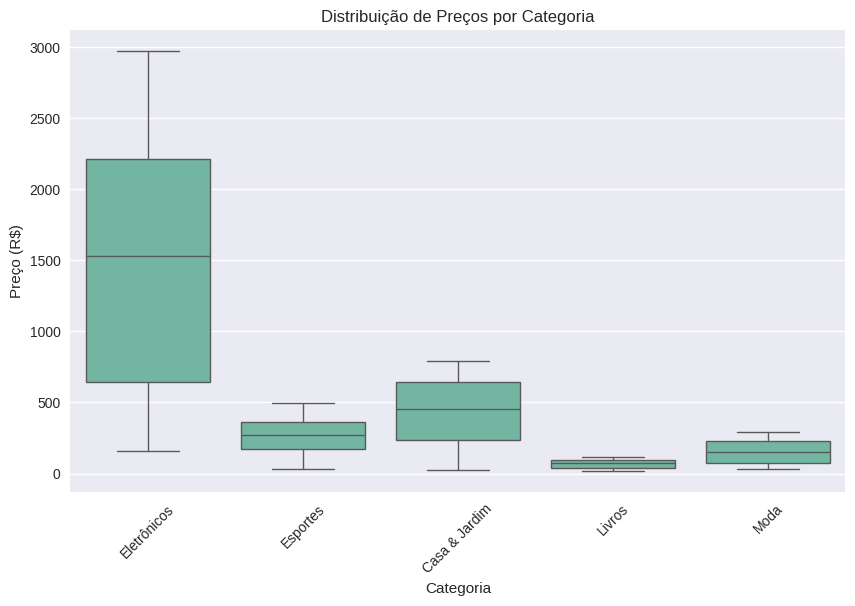


2.4. Visualização: Distribuição de Valores Totais dos Pedidos
Gerando histograma para mostrar a distribuição dos valores totais (pedidos entregues).
Gráfico salvo em: /content/drive/MyDrive/Ecommerce_Dataset/order_total_distribution.png


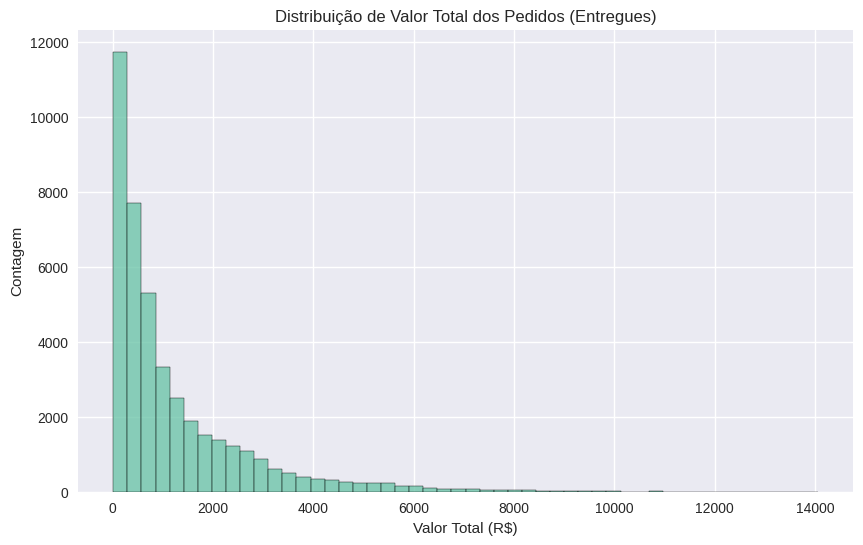

In [10]:
print("\n" + "="*60)
print("2. ANÁLISE EXPLORATÓRIA")
print("="*60)

# 2.1. Estatísticas descritivas das tabelas
print("\n2.1. Estatísticas Descritivas")
print("Resumo das tabelas para entender a estrutura e valores dos dados.")

print("\nTabela customers (clientes):")
print(customers_df.describe(include='all'))
print("\nTabela products (produtos):")
print(products_df.describe(include='all'))
print("\nTabela orders (pedidos):")
print(orders_df.describe(include='all'))
print("\nTabela order_items (itens de pedidos):")
print(order_items_df.describe())

# 2.2. Identificação de outliers no valor total dos pedidos
print("\n2.2. Identificação de Outliers no Valor Total dos Pedidos")
print("Usando o método IQR para detectar valores extremos em total_amount.")
Q1 = orders_df['total_amount'].quantile(0.25)
Q3 = orders_df['total_amount'].quantile(0.75)
IQR = iqr(orders_df['total_amount'])
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = orders_df[(orders_df['total_amount'] < lower_bound) | (orders_df['total_amount'] > upper_bound)]
print(f"\nNúmero de outliers encontrados: {len(outliers)}")
print("Exemplos de outliers (primeiros 5):")
print(outliers[['order_id', 'total_amount', 'status']].head())

# 2.3. Gráfico: Distribuição de preços por categoria
print("\n2.3. Visualização: Distribuição de Preços por Categoria")
print("Gerando boxplot para mostrar a variação de preços dos produtos por categoria.")
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='price', data=products_df)
plt.title('Distribuição de Preços por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.savefig(base_path + 'price_distribution_by_category.png')
print(f"Gráfico salvo em: {base_path}price_distribution_by_category.png")
plt.show()

# 2.4. Gráfico: Distribuição de valores totais dos pedidos
print("\n2.4. Visualização: Distribuição de Valores Totais dos Pedidos")
print("Gerando histograma para mostrar a distribuição dos valores totais (pedidos entregues).")
plt.figure(figsize=(10, 6))
sns.histplot(orders_df[orders_df['status'] == 'Entregue']['total_amount'], bins=50)
plt.title('Distribuição de Valor Total dos Pedidos (Entregues)')
plt.xlabel('Valor Total (R$)')
plt.ylabel('Contagem')
plt.savefig(base_path + 'order_total_distribution.png')
print(f"Gráfico salvo em: {base_path}order_total_distribution.png")
plt.show()


# **3. Análise Temporal**
 Objetivo: Analisar tendências de receita e clientes ao longo do tempo.


3. ANÁLISE TEMPORAL

3.1. Receita Mensal
Calculando a soma do valor total dos pedidos entregues por mês em 2024.

Visualização: Tendência de Receita Mensal
Gerando gráfico de linha para mostrar a evolução da receita mensal.
Gráfico salvo em: /content/drive/MyDrive/Ecommerce_Dataset/monthly_revenue_trend.png


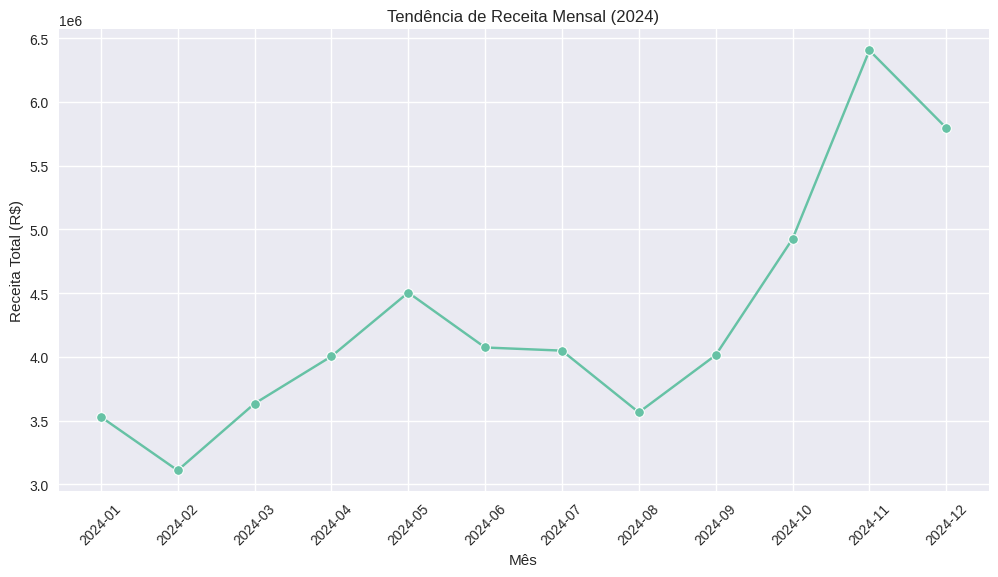


3.2. Crescimento Mês a Mês
Calculando o percentual de crescimento da receita entre meses consecutivos.

Crescimento Mês a Mês (%):
   order_date  growth
0     2024-01     NaN
1     2024-02  -11.92
2     2024-03   16.86
3     2024-04   10.21
4     2024-05   12.50
5     2024-06   -9.57
6     2024-07   -0.60
7     2024-08  -11.96
8     2024-09   12.59
9     2024-10   22.74
10    2024-11   30.02
11    2024-12   -9.50

3.3. Clientes Únicos por Mês
Contando o número de clientes distintos que fizeram pedidos entregues por mês.

Visualização: Clientes Únicos por Mês
Gerando gráfico de linha para mostrar a evolução de clientes únicos.
Gráfico salvo em: /content/drive/MyDrive/Ecommerce_Dataset/monthly_unique_customers.png


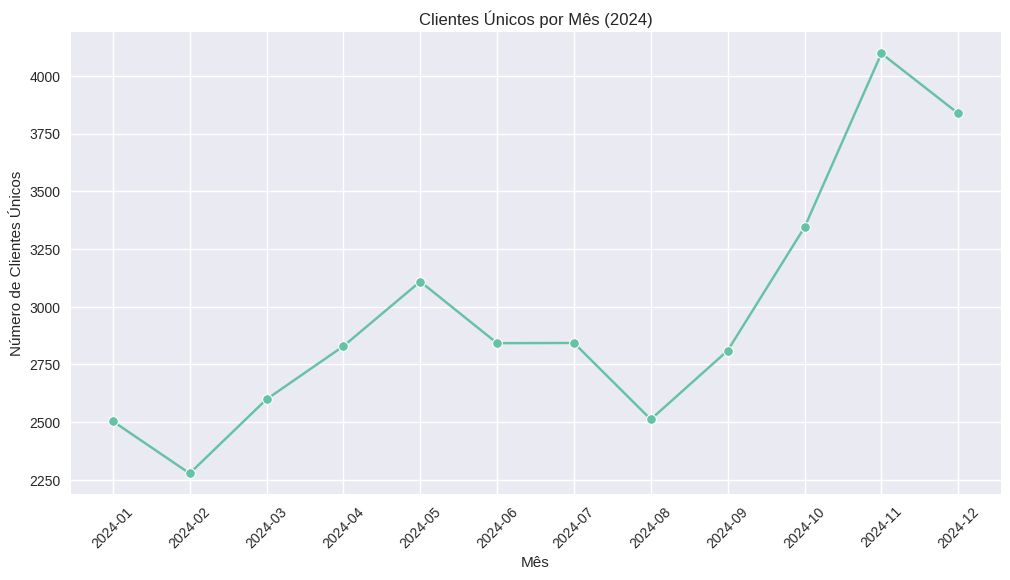

In [11]:
print("\n" + "="*60)
print("3. ANÁLISE TEMPORAL")
print("="*60)

# 3.1. Receita mensal (pedidos entregues)
print("\n3.1. Receita Mensal")
print("Calculando a soma do valor total dos pedidos entregues por mês em 2024.")
monthly_revenue = orders_df[orders_df['status'] == 'Entregue'].groupby(
    orders_df['order_date'].dt.strftime('%Y-%m')
)['total_amount'].sum().reset_index()

# Gráfico: Tendência de receita mensal
print("\nVisualização: Tendência de Receita Mensal")
print("Gerando gráfico de linha para mostrar a evolução da receita mensal.")
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_date', y='total_amount', data=monthly_revenue, marker='o')
plt.title('Tendência de Receita Mensal (2024)')
plt.xlabel('Mês')
plt.ylabel('Receita Total (R$)')
plt.xticks(rotation=45)
plt.savefig(base_path + 'monthly_revenue_trend.png')
print(f"Gráfico salvo em: {base_path}monthly_revenue_trend.png")
plt.show()

# 3.2. Crescimento mês a mês
print("\n3.2. Crescimento Mês a Mês")
print("Calculando o percentual de crescimento da receita entre meses consecutivos.")
monthly_revenue['growth'] = monthly_revenue['total_amount'].pct_change() * 100
print("\nCrescimento Mês a Mês (%):")
print(monthly_revenue[['order_date', 'growth']].round(2))

# 3.3. Clientes únicos por mês
print("\n3.3. Clientes Únicos por Mês")
print("Contando o número de clientes distintos que fizeram pedidos entregues por mês.")
monthly_customers = orders_df[orders_df['status'] == 'Entregue'].groupby(
    orders_df['order_date'].dt.strftime('%Y-%m')
)['customer_id'].nunique().reset_index(name='unique_customers')

# Gráfico: Clientes únicos por mês
print("\nVisualização: Clientes Únicos por Mês")
print("Gerando gráfico de linha para mostrar a evolução de clientes únicos.")
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_date', y='unique_customers', data=monthly_customers, marker='o')
plt.title('Clientes Únicos por Mês (2024)')
plt.xlabel('Mês')
plt.ylabel('Número de Clientes Únicos')
plt.xticks(rotation=45)
plt.savefig(base_path + 'monthly_unique_customers.png')
print(f"Gráfico salvo em: {base_path}monthly_unique_customers.png")
plt.show()



# **4. Segmentação de Clientes (RFM)**
Objetivo: Segmentar clientes com base em Recência, Frequência e Monetário.


4. SEGMENTAÇÃO DE CLIENTES (RFM)
Calculando Recência (dias desde a última compra), Frequência (número de pedidos) e Monetário (valor total gasto).

4.2. Classificação em Quartis
Dividindo clientes em 4 grupos para Recência, Frequência e Monetário.

4.3. Definindo Segmentos de Clientes
Classificando clientes em VIP, Regular, Ocasional e Inativo com base no RFM Score.

Segmentação de Clientes (primeiros 10):
   customer_id           customer_name  recency  frequency  monetary  \
0            1  João Guilherme da Cruz       16          5   7031.01   
1            2   Henrique da Conceição       12          5   3586.51   
2            3         Emanuel Sampaio       29          7   6507.24   
3            4            Aylla Fogaça       80          4   2803.53   
4            5  Maria Cecília Oliveira       33          8   4573.63   
5            6   Carlos Eduardo Garcia       52          3   1039.97   
6            7      Ana Sophia Pereira        8          4   1964.83   
7            

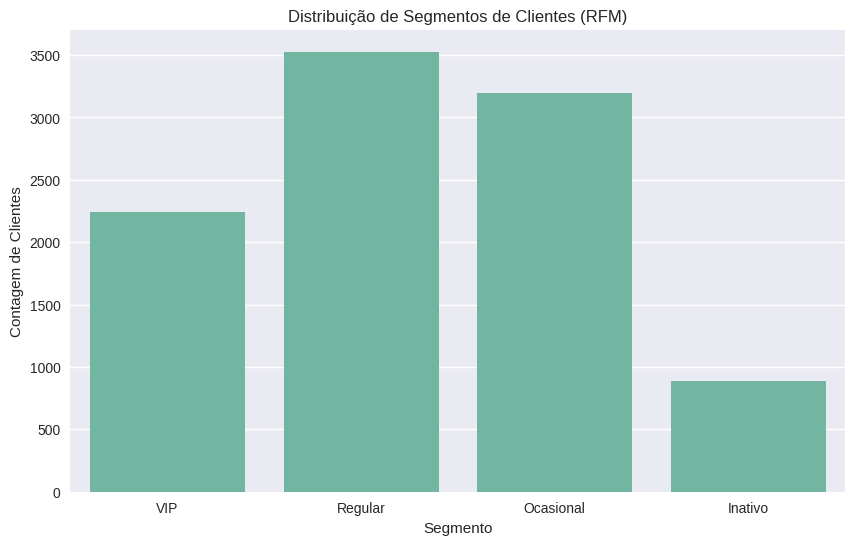

In [12]:
print("\n" + "="*60)
print("4. SEGMENTAÇÃO DE CLIENTES (RFM)")
print("="*60)
print("Calculando Recência (dias desde a última compra), Frequência (número de pedidos) e Monetário (valor total gasto).")

# 4.1. Calcular RFM
# Data de referência: último dia nos dados + 1
reference_date = orders_df['order_date'].max() + pd.Timedelta(days=1)
rfm = orders_df[orders_df['status'] == 'Entregue'].groupby('customer_id').agg({
    'order_date': lambda x: (reference_date - x.max()).days,  # Recência
    'order_id': 'count',  # Frequência
    'total_amount': 'sum'  # Monetário
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']
rfm = rfm.merge(customers_df[['customer_id', 'customer_name']], on='customer_id')

# 4.2. Classificar clientes em quartis
print("\n4.2. Classificação em Quartis")
print("Dividindo clientes em 4 grupos para Recência, Frequência e Monetário.")
rfm['R_score'] = pd.qcut(rfm['recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')  # Menor recência = melhor
rfm['F_score'] = pd.qcut(rfm['frequency'], 4, labels=[1, 2, 3, 4], duplicates='drop')  # Maior frequência = melhor
rfm['M_score'] = pd.qcut(rfm['monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')  # Maior monetário = melhor

# Calcular RFM Score
rfm['RFM_score'] = rfm['R_score'].astype(int) + rfm['F_score'].astype(int) + rfm['M_score'].astype(int)

# 4.3. Definir segmentos
print("\n4.3. Definindo Segmentos de Clientes")
print("Classificando clientes em VIP, Regular, Ocasional e Inativo com base no RFM Score.")
def segment_client(row):
    if row['RFM_score'] >= 10:
        return 'VIP'
    elif row['RFM_score'] >= 7:
        return 'Regular'
    elif row['RFM_score'] >= 4:
        return 'Ocasional'
    else:
        return 'Inativo'

rfm['segment'] = rfm.apply(segment_client, axis=1)

print("\nSegmentação de Clientes (primeiros 10):")
print(rfm[['customer_id', 'customer_name', 'recency', 'frequency', 'monetary', 'RFM_score', 'segment']].head(10))

# 4.4. Gráfico: Distribuição de segmentos RFM
print("\n4.4. Visualização: Distribuição de Segmentos RFM")
print("Gerando gráfico de barras para mostrar a contagem de clientes por segmento.")
plt.figure(figsize=(10, 6))
sns.countplot(x='segment', data=rfm, order=['VIP', 'Regular', 'Ocasional', 'Inativo'])
plt.title('Distribuição de Segmentos de Clientes (RFM)')
plt.xlabel('Segmento')
plt.ylabel('Contagem de Clientes')
plt.savefig(base_path + 'rfm_segment_distribution.png')
print(f"Gráfico salvo em: {base_path}rfm_segment_distribution.png")
plt.show()



# **5. Salvando Resultados**
Objetivo: Salvar resultados em CSVs para uso no dashboard ou relatórios.

In [13]:
print("\n" + "="*60)
print("5. SALVANDO RESULTADOS")
print("="*60)
print("Salvando resultados em arquivos CSV para uso posterior (ex.: dashboard).")

monthly_revenue.to_csv(base_path + 'monthly_revenue.csv', index=False)
rfm.to_csv(base_path + 'rfm_segmentation.csv', index=False)
print(f"Arquivos salvos:")
print(f"- {base_path}monthly_revenue.csv")
print(f"- {base_path}rfm_segmentation.csv")

print("\nAnálise concluída com sucesso!")


5. SALVANDO RESULTADOS
Salvando resultados em arquivos CSV para uso posterior (ex.: dashboard).
Arquivos salvos:
- /content/drive/MyDrive/Ecommerce_Dataset/monthly_revenue.csv
- /content/drive/MyDrive/Ecommerce_Dataset/rfm_segmentation.csv

Análise concluída com sucesso!


## **Resumo dos resultados**

1. Análise Exploratória:

    Estatísticas descritivas: Fornecem uma visão geral dos dados:
      - customers: 10.000 clientes, com 8.864 nomes únicos e 2.973 cidades.

      - products: 500 produtos, com preços variando de 15,53 a 2971,16 reais (média de R$485,32).

      - orders: 50.000 pedidos, com total_amount de 12,75 a 14.617,32 reais (média de R$1.211,58).

      - order_items: 101.382 itens, com quantidades de 1 a 3 e preços unitários de 12,43 a 3.118,45 reais.


  - Outliers: 3.481 pedidos com valores extremos em total_amount, indicando compras de alto valor (ex.: R$10.873,03).

  - Gráficos: Boxplot de preços por categoria e histograma de valores de pedidos mostram a distribuição dos dados.

2. Análise Temporal:

  - Receita mensal: Confirma o padrão sazonal, com picos em novembro (6,4M) e dezembro (5,8M).

  - Crescimento mês a mês: Variações significativas, como +30,02% em novembro e -9,50% em dezembro.

  - Clientes únicos: Pico em novembro (4.593 clientes), consistente com a sazonalidade.

3. Segmentação RFM:

  - Clientes segmentados em VIP, Regular, Ocasional e Inativo com base em recência, frequência e monetário.

  - Exemplo: João Guilherme da Cruz (RFM_score=10, VIP) comprou recentemente (16 dias), 5 vezes, gastando R$7.031,01.

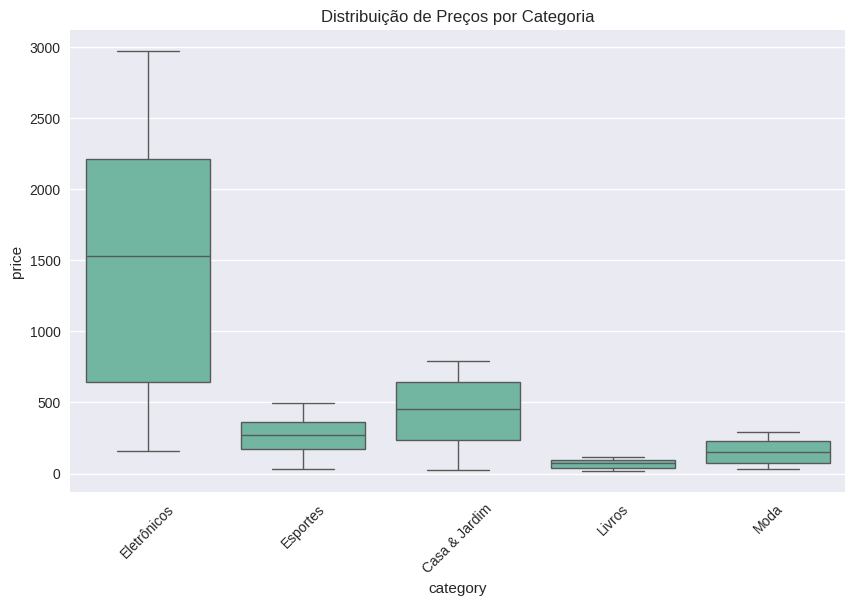

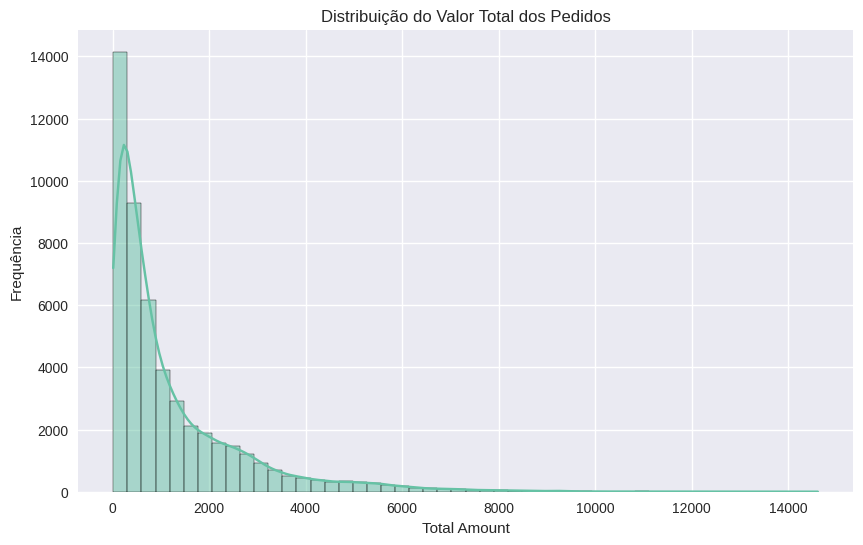

In [14]:
# Importar bibliotecas

# Gráfico 1: Distribuição de Preços por Categoria
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='price', data=products)
plt.title('Distribuição de Preços por Categoria')
plt.xticks(rotation=45)
plt.show()

# Gráfico 2: Distribuição do Valor Total dos Pedidos
plt.figure(figsize=(10, 6))
sns.histplot(orders['total_amount'], bins=50, kde=True)
plt.title('Distribuição do Valor Total dos Pedidos')
plt.xlabel('Total Amount')
plt.ylabel('Frequência')
plt.show()

# Fechar conexão
conn.close()